<a href="https://colab.research.google.com/github/Pauline0115/Pauline0115.github.io/blob/main/Experiment_2_(hidden_layer_size).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# initialization

## Loading Packages

In [ ]:
import numpy as np #提供數據庫&處理函數
import pandas as pd #提供数据分析和数据操作
import matplotlib.pyplot as plt #繪圖

In [ ]:
from sklearn.model_selection import train_test_split #提供模型選擇、交叉驗證、數據集拆分、评估模型性能的工具
from sklearn.preprocessing import StandardScaler #數據預處理标准化、缩放、编码、填充缺失值

In [ ]:
import torch #開源機器學習框架，用於建構和訓練神經網路&深度學習，使深度學習模型開發&訓練更容易
import torch.nn as nn #使用pytorch的神經網路模塊，內含建構模型的函數、神經層、損失函數
import torch.optim as optim #使用pytorch中優化器模塊
from torch.utils.data import DataLoader, TensorDataset #T:數據加載&處理，將數據張量&標籤張量綁在一起；D:可將數據分小批次(訓練)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split #random_split隨機地將數據分成多個子集

## Loading Dataset

In [ ]:
df1 = pd.read_csv("/content/sample_data/california_housing_train.csv")#使用pandas庫從CVS文件中讀取數據集，存在dataframe中
df2 = pd.read_csv("/content/sample_data/california_housing_test.csv")

# EDA

In [ ]:
df = pd.concat([df1, df2], axis=0) #將df1&df2由垂直方向(axis=0)合併變成一個新的dataframe數據

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [ ]:
df.describe() #提供一些data基本資訊


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,-119.566172,35.626750,28.627750,2637.051550,537.991800,1425.557650,499.525450,3.872132,207082.716750
std,2.003609,2.136141,12.582229,2176.314757,420.631119,1131.048487,381.729517,1.900356,115557.055856
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1451.000000,296.000000,788.000000,280.000000,2.562500,119800.000000
50%,-118.490000,34.250000,29.000000,2126.000000,434.000000,1166.000000,409.000000,3.536000,179800.000000
75%,-118.000000,37.710000,37.000000,3149.000000,647.000000,1724.000000,604.000000,4.745325,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.isnull().sum() #找是否有缺失值&有幾個缺失值(缺失值true=回傳1)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

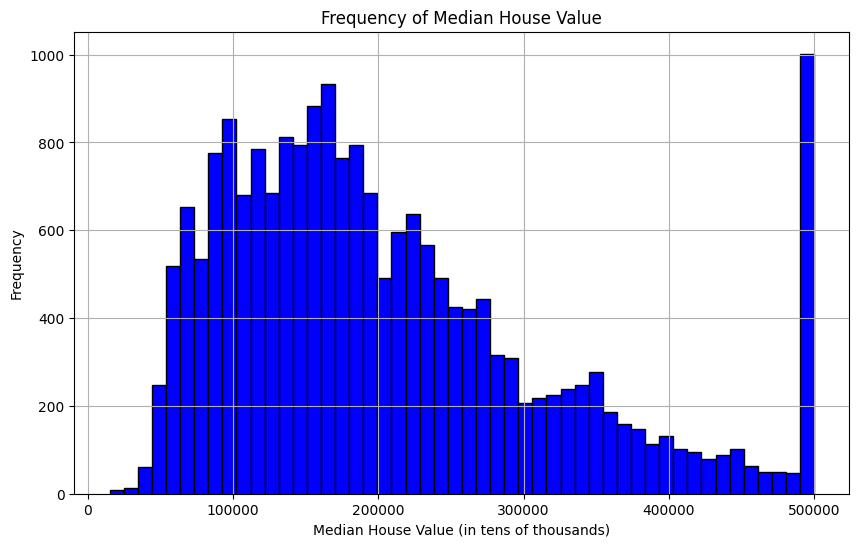

In [ ]:
plt.figure(figsize=(10, 6)) #畫圖(寬,高)
plt.hist(df["median_house_value"].values, bins=50, color='blue', edgecolor='black') #要以哪一個欄位畫圖，要畫幾條柱
plt.title('Frequency of Median House Value') #設圖的名稱
plt.xlabel('Median House Value (in tens of thousands)') #設x座標名字
plt.ylabel('Frequency') #設y座標名字
plt.grid(True) #顯示網格線
plt.show()

# Processing

## Splitting Dependent and Independent Variables

In [ ]:
X=df.iloc[:,:-1].values #選擇所有特徵，.value轉換目標數據為Numpy數組-->方便執行運算
y=df.iloc[:,-1].values #選擇目標數據欄位

In [ ]:
X,y

(array([[-114.31  ,   34.19  ,   15.    , ..., 1015.    ,  472.    ,
            1.4936],
        [-114.47  ,   34.4   ,   19.    , ..., 1129.    ,  463.    ,
            1.82  ],
        [-114.56  ,   33.69  ,   17.    , ...,  333.    ,  117.    ,
            1.6509],
        ...,
        [-119.7   ,   36.3   ,   10.    , ...,  693.    ,  220.    ,
            2.2895],
        [-117.12  ,   34.1   ,   40.    , ...,   46.    ,   14.    ,
            3.2708],
        [-119.63  ,   34.42  ,   42.    , ...,  753.    ,  260.    ,
            8.5608]]),
 array([ 66900.,  80100.,  85700., ...,  62000., 162500., 500001.]))

## Handling Missing Value

In [ ]:
# no missing value

## Categorical Data to Digital Data 將分類數據(文字符號)轉換為數字數據

In [ ]:
# no categorical data

## Splitting Training and Testing Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #test_size表示測試數據要佔20%，random_state=0有助於驗證結果可重複性

## Feature Scaling

In [ ]:
sc_X = StandardScaler().fit(X_train) #創建標準化器，擬合fit到特徵數據x_train。標準化器的作用是計算x_train的平均值跟標準差，
X_train = sc_X.transform(X_train) #將已擬合的標準化器，對X_train進行標準化
X_test = sc_X.transform(X_test) #確保測試數據和訓練數據都經過同樣的處理，以確保一致性

# NN (Neural Network神經網路)

## Building NN

In [ ]:
X_train

array([[ 0.75402573, -0.70792189,  0.42890927, ...,  0.20468535,
         0.19820995,  0.36624131],
       [-1.31821002,  0.86096571,  0.34948898, ...,  0.49407204,
        -0.43287621, -0.49849485],
       [ 1.19843292, -1.35420992,  0.74659043, ...,  0.82192705,
         1.5725174 , -0.4868369 ],
       ...,
       [-0.06987523,  0.58465416, -0.92123564, ..., -0.37933371,
        -0.49024767,  1.61280151],
       [-0.5642158 , -0.16466529, -1.15949651, ...,  0.40052407,
         0.42769582,  0.38745667],
       [ 0.93877928, -0.95613396, -1.2389168 , ...,  0.0053495 ,
        -0.17992019,  2.13152768]])

In [ ]:
class NeuralNetwork(nn.Module):
  """Define the structure of my neural network"""
  def __init__(self, input_size, hidden_size1, hidden_size2, output_size): #self類似建構子、input_size特徵數、output_size標簽數
      super(NeuralNetwork, self).__init__() #類似初始化建構子，也要初始化父類別的建構子，NN是子類別class
      self.fc1 = nn.Linear(input_size, hidden_size1)  # 第1隱藏層
      self.relu = nn.ReLU()  # ReLU激活函數
      self.fc2 = nn.Linear(hidden_size1, hidden_size2)  # 第2隱藏層
      self.fc3 = nn.Linear(hidden_size2, output_size)  # 輸出層

  def forward(self, x):
      out = self.fc1(x) #將輸入x傳遞給第一隱藏層fcl
      out = self.relu(out)
      out = self.fc2(out)
      out = self.relu(out)
      out = self.fc3(out)
      return out

## Setting Hyperparameter超參數(需人為設置)

### 實驗: hidden layer size

In [ ]:

X.shape


(20000, 8)

####自定義

In [ ]:
# 這邊可以做實驗，針對Hidden Layer神經元個數下去定義自己的公式

input_size = X.shape[1]  # Number of neurons in the input layer
hidden_size1 = 20  # Number of neurons in the first hidden layer
hidden_size2 = 10  # Number of neurons in the second hidden layer
output_size = 1  # Number of neurons in the output layer

#### hidden_size1 = 3*input_size    &&   hidden_size2 = (input_size + hidden_size1)/2



In [ ]:
input_size = X.shape[1]
hidden_size1 = 3*input_size
hidden_size2 = (input_size + hidden_size1)/2
output_size = 1

#### input_size : hidden_size1 : hidden_size2 = 1 : 3 : 1

In [ ]:
input_size = X.shape[1]
hidden_size1 = 3*input_size
hidden_size2 = input_size
output_size = 1

## Create a NN instance

In [ ]:
net = NeuralNetwork(input_size, hidden_size1, hidden_size2, output_size)

In [ ]:
# # you can set the weight initializer here
# # custom initialization
# def weights_init(m):
#     if isinstance(m, nn.Linear):
#         nn.init.xavier_normal_(m.weight)
#         nn.init.zeros_(m.bias)  # or you could use a small constant value like 0.1

# # Apply the initialization to each layer of the network
# net.apply(weights_init)

## Setting Optimizer and Loss Function

In [ ]:
optimizer = optim.Adam(net.parameters(),lr=0.001)
loss_fn = nn.MSELoss()  # Mean squared error loss

## Training

In [ ]:
X_train = torch.tensor(X_train, dtype=torch.float32) #將Numpy數據組轉換為PyTorch數據結構，PyTorch包含自動微分、GPU內建支持、本身就是深度學習框架，Numpy是數值計算庫
y_train = torch.tensor(y_train, dtype=torch.float32) #小數點32位

In [ ]:
# Create a DataLoader for your training data
train_dataset = TensorDataset(X_train, y_train) #將X_train,y_train組合在一起成一個數據集
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True) #將數據批量加載到模型進行訓練。DataLoader(數據集,每個批次有多少數據量,每個訓練迭代是否打亂數據順序)

In [ ]:
train_size = int(0.8 * len(X_train))
val_size = len(X_train) - train_size

In [ ]:
# Create a DataLoader for your training data
train_dataset = TensorDataset(X_train, y_train)
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)

## 實驗: 訓練次數

##訓練模型

###訓練次數:50

In [ ]:
# Define epoch
num_epochs = 50 #訓練50次

In [ ]:
losses = []  # list to store loss values
preds = []
gt = []

for epoch in range(num_epochs):
    epoch_loss = 0  # sum of loss for each epoch
    for data in train_loader: # a batch
        inputs, labels = data #會自動將第一個元素分配給變量，第二個元素分配給標籤
        optimizer.zero_grad()  # Zero the gradient buffers  #每次迭代將梯度清零
        outputs = net(inputs)  # Get network outputs (forward propagation)
        loss = loss_fn(outputs, labels)  # Calculate loss  #前面有定義loss_fn是距離的平方
        loss.backward()  # Backpropagate the loss (backward propagation)  #*backpropagate:計算梯度方向
        optimizer.step()  # Update the weights  #前面設定用Adam，*optimizer:計算梯度力度大小 & 參數更新的過程

        epoch_loss += loss.item()  # accumulate loss per batch #其中loss.item()是指每個批次中所有樣本的損失值加總
        preds += outputs #將每一批次的所有預測值儲存
        gt += labels #將Ground Truth真實標籤(結果)儲存

    epoch_loss /= len(train_loader)  # average loss for the epoch
    losses.append(epoch_loss)  # store average loss for the epoch

    # Print loss for each epoch
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/50, Loss: 63089987584.0
Epoch 2/50, Loss: 28092637184.0
Epoch 3/50, Loss: 59192033280.0
Epoch 4/50, Loss: 41236643840.0
Epoch 5/50, Loss: 48056549376.0
Epoch 6/50, Loss: 38790467584.0
Epoch 7/50, Loss: 22385856512.0
Epoch 8/50, Loss: 36429246464.0
Epoch 9/50, Loss: 15119480832.0
Epoch 10/50, Loss: 25343688704.0
Epoch 11/50, Loss: 26934036480.0
Epoch 12/50, Loss: 24829743104.0
Epoch 13/50, Loss: 28577804288.0
Epoch 14/50, Loss: 17093442560.0
Epoch 15/50, Loss: 21776351232.0
Epoch 16/50, Loss: 12255838208.0
Epoch 17/50, Loss: 14617351168.0
Epoch 18/50, Loss: 19070928896.0
Epoch 19/50, Loss: 24146610176.0
Epoch 20/50, Loss: 23092664320.0
Epoch 21/50, Loss: 13296060416.0
Epoch 22/50, Loss: 19364057088.0
Epoch 23/50, Loss: 12186648576.0
Epoch 24/50, Loss: 16864112640.0
Epoch 25/50, Loss: 29186414592.0
Epoch 26/50, Loss: 15398031360.0
Epoch 27/50, Loss: 16375172096.0
Epoch 28/50, Loss: 22044981248.0
Epoch 29/50, Loss: 16081294336.0
Epoch 30/50, Loss: 16917090304.0
Epoch 31/50, Loss: 

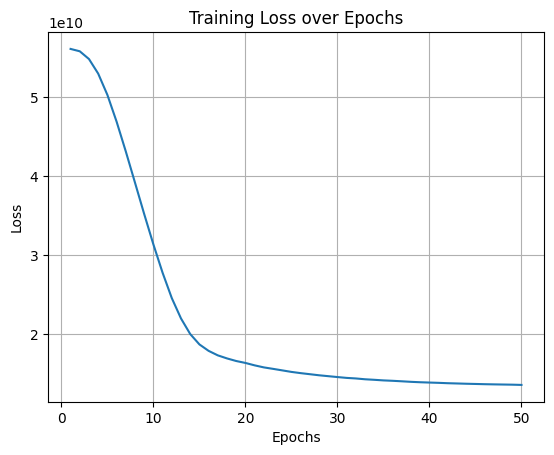

In [ ]:
plt.figure()
plt.plot(range(1, num_epochs+1), losses)
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [ ]:
# 转换为 PyTorch 张量
preds_tensor = torch.tensor(preds)
print(preds_tensor.size())
# 获取均值和标准差
mean = sc_X.mean_
std = np.sqrt(sc_X.var_)

# 创建形状匹配的均值和标准差张量
#mean_tensor = torch.tensor([mean] * len(preds_tensor))
#std_tensor = torch.tensor([std] * len(preds_tensor))

# 反标准化
#denorm_pred = (preds_tensor * std_tensor) + mean_tensor
denorm_preds = (preds * std) + mean
# denorm_pred 包含了反标准化后的预测结果

torch.Size([800000])


RuntimeError: ignored

In [ ]:
# 假设 sc_X 已经用 X_train 进行拟合并标准化了数据
# 获取均值和标准差
mean = sc_X.mean_
std = np.sqrt(sc_X.var_)

# 对预测值进行反标准化
preds_unscaled = preds * std + mean

# preds_unscaled 包含了反标准化后的预测结果

###訓練次數:100

In [ ]:
# Define epoch
num_epochs = 100 #訓練100次

In [ ]:
train_losses = []  # list to store loss values
val_losses = []

train_preds = []
val_preds = []

for epoch in range(num_epochs):
    # training phase
    net.train()
    train_loss = 0

    #epoch_loss = 0  # sum of loss for each epoch
    for data in train_loader: # a batch
        inputs, labels = data #會自動將第一個元素分配給變量，第二個元素分配給標籤
        optimizer.zero_grad()  # Zero the gradient buffers  #每次迭代將梯度清零
        outputs = net(inputs)  # Get network outputs (forward propagation)
        loss = loss_fn(outputs, labels)  # Calculate loss  #前面有定義loss_fn是距離的平方
        loss.backward()  # Backpropagate the loss (backward propagation)  #*backpropagate:計算梯度方向
        optimizer.step()  # Update the weights  #前面設定用Adam，*optimizer:計算梯度力度大小 & 參數更新的過程

        train_loss += loss.item()  # accumulate loss per batch #其中loss.item()是指每個批次中所有樣本的損失值加總
        train_preds += outputs
        #preds += outputs #將每一批次的所有預測值儲存
        #gt += labels #將Ground Truth真實標籤(結果)儲存

    train_loss /= len(train_loader)  # average loss for the epoch
    train_losses.append(train_loss)  # store average loss for the epoch
    #epoch_loss /= len(train_loader)  # average loss for the epoch
    #losses.append(epoch_loss)  # store average loss for the epoch

    # validation phase
    net.eval()
    val_loss = 0
    with torch.no_grad():
        for data, target in val_loader:
            outputs = net(data) # forward propagation
            loss = loss_fn(outputs, target)

            val_loss += loss.item()
            val_preds += outputs

        val_loss /= len(val_loader)
        val_losses.append(val_loss)

    # Print loss for each epoch
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss}, Validation Loss: {val_loss}')



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/100, Train Loss: 56458415892.48, Validation Loss: 54073829478.4
Epoch 2/100, Train Loss: 55029667082.24, Validation Loss: 51311666667.52
Epoch 3/100, Train Loss: 50553771212.8, Validation Loss: 45226591293.44
Epoch 4/100, Train Loss: 43060286850.56, Validation Loss: 36969935482.88
Epoch 5/100, Train Loss: 34423197580.8, Validation Loss: 29065608048.64
Epoch 6/100, Train Loss: 26955228677.12, Validation Loss: 23260912547.84
Epoch 7/100, Train Loss: 22054478775.04, Validation Loss: 20107951385.6
Epoch 8/100, Train Loss: 19598492387.84, Validation Loss: 18714391695.36
Epoch 9/100, Train Loss: 18442936194.56, Validation Loss: 17865898414.08
Epoch 10/100, Train Loss: 17673380258.56, Validation Loss: 17314762496.0
Epoch 11/100, Train Loss: 17093978048.0, Validation Loss: 16690053237.76
Epoch 12/100, Train Loss: 16592789237.76, Validation Loss: 16163210096.64
Epoch 13/100, Train Loss: 16113762851.84, Validation Loss: 15802808637.44
Epoch 14/100, Train Loss: 15784167539.2, Validation L

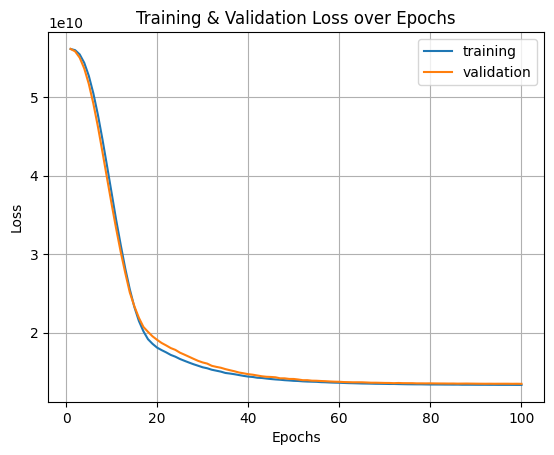

In [ ]:
plt.figure()
plt.plot(range(1, num_epochs+1), train_losses, label="training")
plt.plot(range(1, num_epochs+1), val_losses, label="validation")

plt.title('Training & Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='best')
plt.show()

# we can choose only 60 epochs

# Testing

In [ ]:
X_test = torch.tensor(X_test, dtype=torch.float32)#轉換為PyTorch
y_test = torch.tensor(y_test, dtype=torch.float32)

In [ ]:
# Create a DataLoader for your testing data
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
# Set the model to evaluation mode
net.eval()

NeuralNetwork(
  (fc1): Linear(in_features=8, out_features=355, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=355, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=1, bias=True)
)

In [ ]:
# Variables to hold predictions and labels
all_preds = []
all_labels = []

# No need to track gradients for evaluation
with torch.no_grad():
  for data in test_loader:
      inputs, labels = data
      outputs = net(inputs)  # Get network outputs
      all_preds.append(outputs.numpy())
      all_labels.append(labels.numpy())

In [ ]:
all_preds = np.concatenate(all_preds, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

In [ ]:
df = pd.DataFrame({
    "pred": all_preds.reshape(-1),
    "ground_truth": all_labels
})

df

,pred,ground_truth
0,208940.937500,262300.0
1,209906.906250,296600.0
2,207837.625000,14999.0
3,206659.734375,315000.0
4,210225.343750,212500.0
...,...,...
3995,211519.375000,83800.0
3996,208549.656250,114600.0
3997,211245.203125,458600.0
3998,211155.750000,500001.0


In [ ]:
# Optionally, calculate some metrics
# For example, mean squared error (assuming regression problem)
mse = np.mean((all_preds - all_labels)**2)
print(f'Mean Squared Error: {mse}') # square value

Mean Squared Error: 13401023488.0


# Experiment

##hidden_layer_size function__1

###function__1

In [ ]:
def my_hidden_neuron_size(N_s, N_i, N_i_pre, N_o, alpha):
  return int((N_s)/((alpha*(N_i+N_o))+(1-alpha)*(N_i_pre)))

In [ ]:
N_s = len(X_train)

input_size = X.shape[1]
output_size = 1
alpha = 5

hidden_size1 = my_hidden_neuron_size(N_s, input_size, 0, output_size, alpha)
hidden_size2 = my_hidden_neuron_size(N_s, hidden_size1, input_size, output_size, alpha)

In [ ]:
new_model = NeuralNetwork(input_size, hidden_size1, hidden_size2, output_size)

In [ ]:
optimizer = optim.Adam(new_model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()  # Mean squared error loss

In [ ]:
train_losses = []
val_losses = []

train_preds = []
val_preds = []

for epoch in range(num_epochs):

    # training phase
    new_model.train()
    train_loss = 0
    for data in train_loader:
        inputs, labels = data
        optimizer.zero_grad()
        outputs = new_model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_preds += outputs

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # validation phase
    new_model.eval()
    val_loss = 0
    with torch.no_grad():
        for data, target in val_loader:
            outputs = new_model(data) # forward propagation
            loss = loss_fn(outputs, target)

            val_loss += loss.item()
            val_preds += outputs

        val_loss /= len(val_loader)
        val_losses.append(val_loss)

    # Print loss for each epoch
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss}, Valiation Loss: {val_loss}')

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/50, Train Loss: 56101737891.84, Valiation Loss: 55522095759.36
Epoch 2/50, Train Loss: 54691202513.92, Valiation Loss: 52727620669.44
Epoch 3/50, Train Loss: 50244483573.76, Valiation Loss: 46541556346.88
Epoch 4/50, Train Loss: 42742358456.32, Valiation Loss: 37958369710.08
Epoch 5/50, Train Loss: 34094237095.68, Valiation Loss: 29674518159.36
Epoch 6/50, Train Loss: 26710617510.4, Valiation Loss: 23569793925.12
Epoch 7/50, Train Loss: 21884212940.8, Valiation Loss: 20182816716.8
Epoch 8/50, Train Loss: 19498061194.24, Valiation Loss: 18651543439.36
Epoch 9/50, Train Loss: 18370280506.88, Valiation Loss: 17896969144.32
Epoch 10/50, Train Loss: 17694851018.24, Valiation Loss: 17148056903.68
Epoch 11/50, Train Loss: 17055191569.92, Valiation Loss: 16605818680.32
Epoch 12/50, Train Loss: 16525330456.32, Valiation Loss: 16051372922.88
Epoch 13/50, Train Loss: 16084052040.96, Valiation Loss: 15697886402.56
Epoch 14/50, Train Loss: 15733445752.32, Valiation Loss: 15325421440.0
Epoch

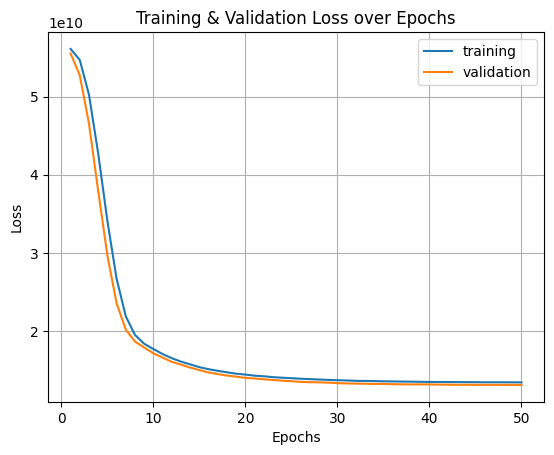

In [ ]:
plt.figure()
plt.plot(range(1, num_epochs+1), train_losses, label="training")
plt.plot(range(1, num_epochs+1), val_losses, label="validation")

plt.title('Training & Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# This formula makes the NN converge more quickly

### Testing

In [ ]:
X_test = torch.tensor(X_test, dtype=torch.float32)#轉換為PyTorch
y_test = torch.tensor(y_test, dtype=torch.float32)

In [ ]:
# Create a DataLoader for your testing data
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
# Set the model to evaluation mode
net.eval()

NeuralNetwork(
  (fc1): Linear(in_features=8, out_features=355, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=355, out_features=9, bias=True)
  (fc3): Linear(in_features=9, out_features=1, bias=True)
)

In [ ]:
# Variables to hold predictions and labels
all_preds = []
all_labels = []

# No need to track gradients for evaluation
with torch.no_grad():
  for data in test_loader:
      inputs, labels = data
      outputs = net(inputs)  # Get network outputs
      all_preds.append(outputs.numpy())
      all_labels.append(labels.numpy())

In [ ]:
all_preds = np.concatenate(all_preds, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

In [ ]:
df = pd.DataFrame({
    "pred": all_preds.reshape(-1),
    "ground_truth": all_labels
})

df

,pred,ground_truth
0,0.154471,262300.0
1,0.149484,296600.0
2,0.213275,14999.0
3,0.295302,315000.0
4,0.131940,212500.0
...,...,...
3995,0.210252,83800.0
3996,0.194178,114600.0
3997,0.123066,458600.0
3998,0.139560,500001.0


In [ ]:
# Optionally, calculate some metrics
# For example, mean squared error (assuming regression problem)
mse = np.mean((all_preds - all_labels)**2)
print(f'Mean Squared Error: {mse}') # square value

Mean Squared Error: 56589398016.0


###emperical_rule經驗法則

In [ ]:
def emperical_rule(N_s, N_i, N_o, alpha):
  """https://eulertech.wordpress.com/2018/01/02/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-network/"""
  return int((N_s)/(alpha*(N_i+N_o)))

In [ ]:
N_s = len(X_train)

input_size = X.shape[1]
output_size = 1
alpha = 5

hidden_size1 = emperical_rule(N_s, input_size, output_size, alpha)
hidden_size2 = emperical_rule(N_s, hidden_size1, output_size, alpha)

In [ ]:
new_model = NeuralNetwork(input_size, hidden_size1, hidden_size2, output_size)

In [ ]:
optimizer = optim.Adam(new_model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()  # Mean squared error loss

In [ ]:
train_losses = []
val_losses = []

train_preds = []
val_preds = []

for epoch in range(num_epochs):

    # training phase
    new_model.train()
    train_loss = 0
    for data in train_loader:
        inputs, labels = data
        optimizer.zero_grad()
        outputs = new_model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_preds += outputs

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # validation phase
    new_model.eval()
    val_loss = 0
    with torch.no_grad():
        for data, target in val_loader:
            outputs = new_model(data) # forward propagation
            loss = loss_fn(outputs, target)

            val_loss += loss.item()
            val_preds += outputs

        val_loss /= len(val_loader)
        val_losses.append(val_loss)

    # Print loss for each epoch
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss}, Valiation Loss: {val_loss}')

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/100, Train Loss: 56270157224.96, Valiation Loss: 55406002196.48
Epoch 2/100, Train Loss: 55803252797.44, Valiation Loss: 54495368929.28
Epoch 3/100, Train Loss: 54240448783.36, Valiation Loss: 52268480880.64
Epoch 4/100, Train Loss: 51276301824.0, Valiation Loss: 48639691079.68
Epoch 5/100, Train Loss: 46996013680.64, Valiation Loss: 43840146821.12
Epoch 6/100, Train Loss: 41821678807.04, Valiation Loss: 38454521221.12
Epoch 7/100, Train Loss: 36369131637.76, Valiation Loss: 33090894704.64
Epoch 8/100, Train Loss: 31217693678.08, Valiation Loss: 28223115796.48
Epoch 9/100, Train Loss: 26776723425.28, Valiation Loss: 24196760104.96
Epoch 10/100, Train Loss: 23264743088.64, Valiation Loss: 21236073861.12
Epoch 11/100, Train Loss: 20883051788.8, Valiation Loss: 19396504939.52
Epoch 12/100, Train Loss: 19350564555.52, Valiation Loss: 18289349038.08
Epoch 13/100, Train Loss: 18520601175.04, Valiation Loss: 17583426923.52
Epoch 14/100, Train Loss: 17904685459.2, Valiation Loss: 17002

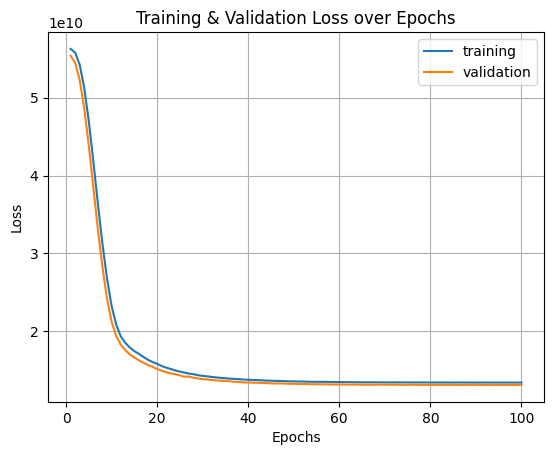

In [ ]:
plt.figure()
plt.plot(range(1, num_epochs+1), train_losses, label="training")
plt.plot(range(1, num_epochs+1), val_losses, label="validation")

plt.title('Training & Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# It converge at about 25th epochs which is a little bit larger than our formula

### Testing

In [ ]:
X_test = torch.tensor(X_test, dtype=torch.float32)#轉換為PyTorch
y_test = torch.tensor(y_test, dtype=torch.float32)

In [ ]:
# Create a DataLoader for your testing data
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
# Set the model to evaluation mode
net.eval()

NeuralNetwork(
  (fc1): Linear(in_features=8, out_features=355, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=355, out_features=9, bias=True)
  (fc3): Linear(in_features=9, out_features=1, bias=True)
)

In [ ]:
# Variables to hold predictions and labels
all_preds = []
all_labels = []

# No need to track gradients for evaluation
with torch.no_grad():
  for data in test_loader:
      inputs, labels = data
      outputs = net(inputs)  # Get network outputs
      all_preds.append(outputs.numpy())
      all_labels.append(labels.numpy())

In [ ]:
all_preds = np.concatenate(all_preds, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

In [ ]:
df = pd.DataFrame({
    "pred": all_preds.reshape(-1),
    "ground_truth": all_labels
})

df

,pred,ground_truth
0,-0.155610,262300.0
1,-0.190210,296600.0
2,0.103912,14999.0
3,-0.042370,315000.0
4,-0.158231,212500.0
...,...,...
3995,0.071407,83800.0
3996,-0.106882,114600.0
3997,-0.180844,458600.0
3998,-0.057974,500001.0


In [ ]:
# Optionally, calculate some metrics
# For example, mean squared error (assuming regression problem)
mse = np.mean((all_preds - all_labels)**2)
print(f'Mean Squared Error: {mse}') # square value

Mean Squared Error: 56589488128.0


##hidden_layer_size function__2(經驗公式乘以2)

In [ ]:
def my_hidden_neuron_size(N_s, N_i, N_o, alpha):
  return int((2*N_s)/(alpha*(N_i+N_o)))

In [ ]:
N_s = len(X_train)

input_size = X.shape[1]
output_size = 1
alpha = 5

hidden_size1 = my_hidden_neuron_size(N_s, input_size, output_size, alpha)
hidden_size2 = my_hidden_neuron_size(N_s, hidden_size1, output_size, alpha)

In [ ]:
new_model = NeuralNetwork(input_size, hidden_size1, hidden_size2, output_size)

In [ ]:
optimizer = optim.Adam(new_model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()  # Mean squared error loss

In [ ]:
train_losses = []
val_losses = []

train_preds = []
val_preds = []

for epoch in range(num_epochs):

    # training phase
    new_model.train()
    train_loss = 0
    for data in train_loader:
        inputs, labels = data
        optimizer.zero_grad()
        outputs = new_model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_preds += outputs

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # validation phase
    new_model.eval()
    val_loss = 0
    with torch.no_grad():
        for data, target in val_loader:
            outputs = new_model(data) # forward propagation
            loss = loss_fn(outputs, target)

            val_loss += loss.item()
            val_preds += outputs

        val_loss /= len(val_loader)
        val_losses.append(val_loss)

    # Print loss for each epoch
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss}, Valiation Loss: {val_loss}')

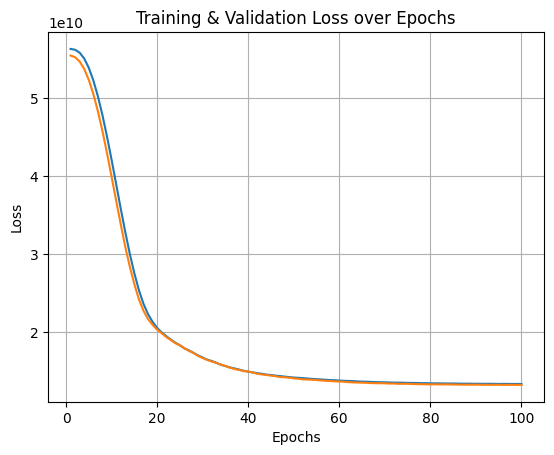

In [ ]:
plt.figure()
plt.plot(range(1, num_epochs+1), train_losses)
plt.plot(range(1, num_epochs+1), val_losses)

plt.title('Training & Validation Loss over Epochs__2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# It converge at about 25th epochs which is a little bit larger than our formula

##hidden_layer_size function__2(分母Ni+No開根號)

In [ ]:
import math
def my_hidden_neuron_size(N_s, N_i, N_o, alpha):
  sqrt_NiNo = math.sqrt(N_i + N_o)
  return int((N_s)/(alpha*(sqrt_NiNo)))

In [ ]:
N_s = len(X_train)

input_size = X.shape[1]
output_size = 1
alpha = 5

hidden_size1 = my_hidden_neuron_size(N_s, input_size, output_size, alpha)
hidden_size2 = my_hidden_neuron_size(N_s, hidden_size1, output_size, alpha)

In [ ]:
new_model = NeuralNetwork(input_size, hidden_size1, hidden_size2, output_size)

In [ ]:
optimizer = optim.Adam(new_model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()  # Mean squared error loss

In [ ]:
train_losses = []
val_losses = []

train_preds = []
val_preds = []

for epoch in range(num_epochs):

    # training phase
    new_model.train()
    train_loss = 0
    for data in train_loader:
        inputs, labels = data
        optimizer.zero_grad()
        outputs = new_model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_preds += outputs

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # validation phase
    new_model.eval()
    val_loss = 0
    with torch.no_grad():
        for data, target in val_loader:
            outputs = new_model(data) # forward propagation
            loss = loss_fn(outputs, target)

            val_loss += loss.item()
            val_preds += outputs

        val_loss /= len(val_loader)
        val_losses.append(val_loss)

    # Print loss for each epoch
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss}, Valiation Loss: {val_loss}')

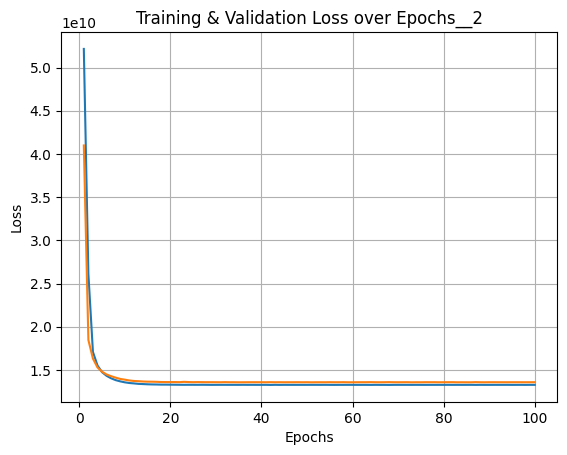

In [ ]:
plt.figure()
plt.plot(range(1, num_epochs+1), train_losses)
plt.plot(range(1, num_epochs+1), val_losses)

plt.title('Training & Validation Loss over Epochs__2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# It converge at about 25th epochs which is a little bit larger than our formula